8.142307737088878


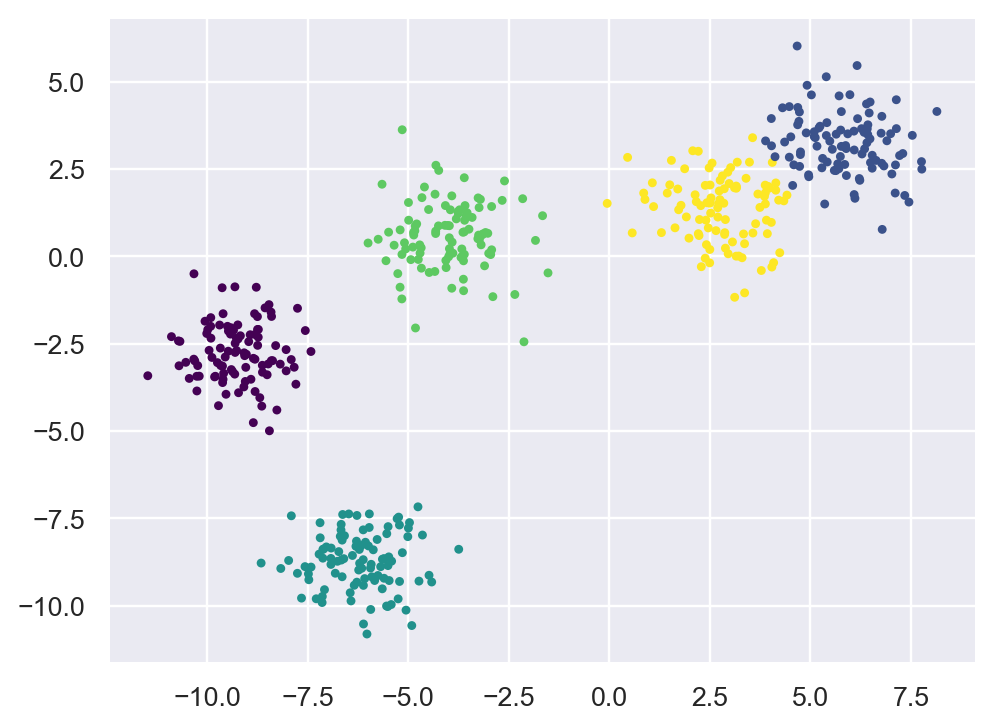

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y_true = make_blobs(n_samples=500, centers=5, 
                       cluster_std=0.9, random_state=17

                       )
kmeans= KMeans(5, random_state=420)
labels = kmeans.fit(X).predict(X)
print(X[:, 0].max())
plt.figure(dpi=175)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=7, cmap='viridis')

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5).fit(X)
labels = gmm.predict(X)
plt.figure(dpi=175)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=7, cmap='viridis')

In [3]:
probabilități = gmm.predict_proba(X)

In [17]:
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt

def plot_gmm(gmm, X, label=True, ax=None):
    '''
    Funcția pentru a trasa rezultatele GMM (Gaussian Mixture Model).
    :param gmm: Obiectul GMM antrenat
    :param X: Datele de intrare
    :param label: Dacă să eticheteze punctele pe grafic cu clusterele prezise sau nu
    :param ax: Axes object, default=None
        Obiectul Axes în care să se traseze graficul
    '''
    def draw_ellipse(position, covariance, ax=None, **kwargs):
        '''
        Funcția pentru a trasa o elipsă dată poziției și covarianței.
        :param position: Poziția elipsei (centroid)
        :param covariance: Matricea de covarianță
        :param ax: Axes object, default=None
            Obiectul Axes în care să se traseze elipsa
        :param kwargs: Alți argumente pentru traiectul elipsei
        '''
        ax = ax or plt.gca()
        if covariance.shape == (2, 2):
            U, s, Vt = np.linalg.svd(covariance)
            angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
            width, height = 2 * np.sqrt(s)
        else:
            angle = 0
            width, height = 2 * np.sqrt(covariance)
        for nsig in range(1, 4):
            ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle=angle))

    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=7, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=7, zorder=2)
    ax.axis('equal')
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)


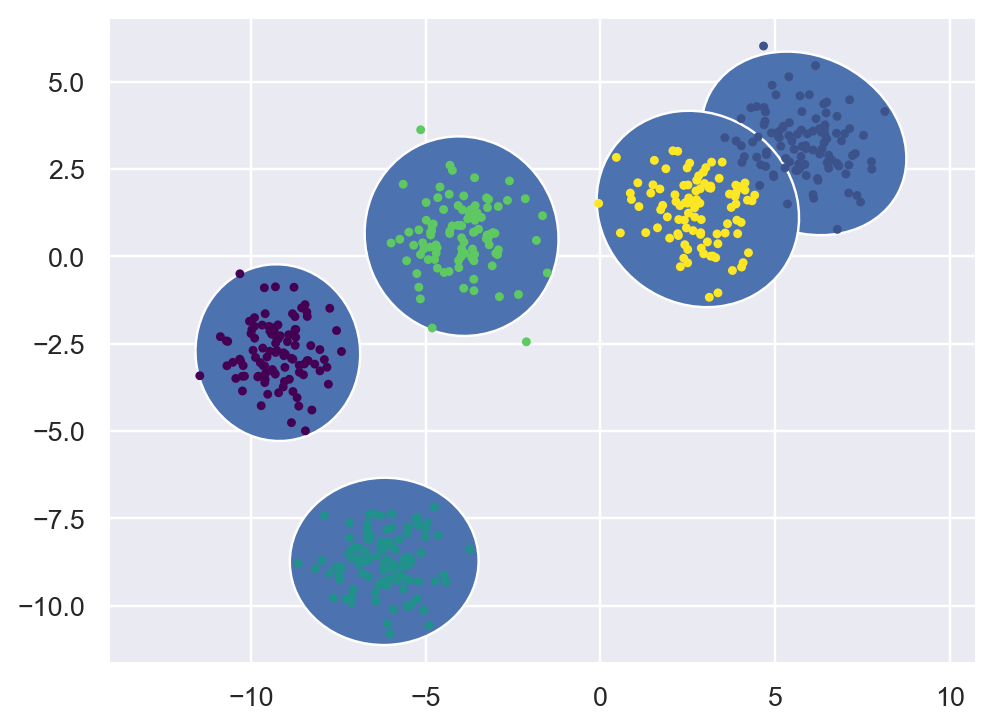

In [18]:
gmm = GaussianMixture(n_components=5, random_state=420)
plt.figure(dpi=175)
plot_gmm(gmm, X)

In [19]:
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1]#răsturnați axele pentru o mai bună grafică
rng = np.random.RandomState(13) 
X_stretched = np.dot(X, rng.randn(2, 2))

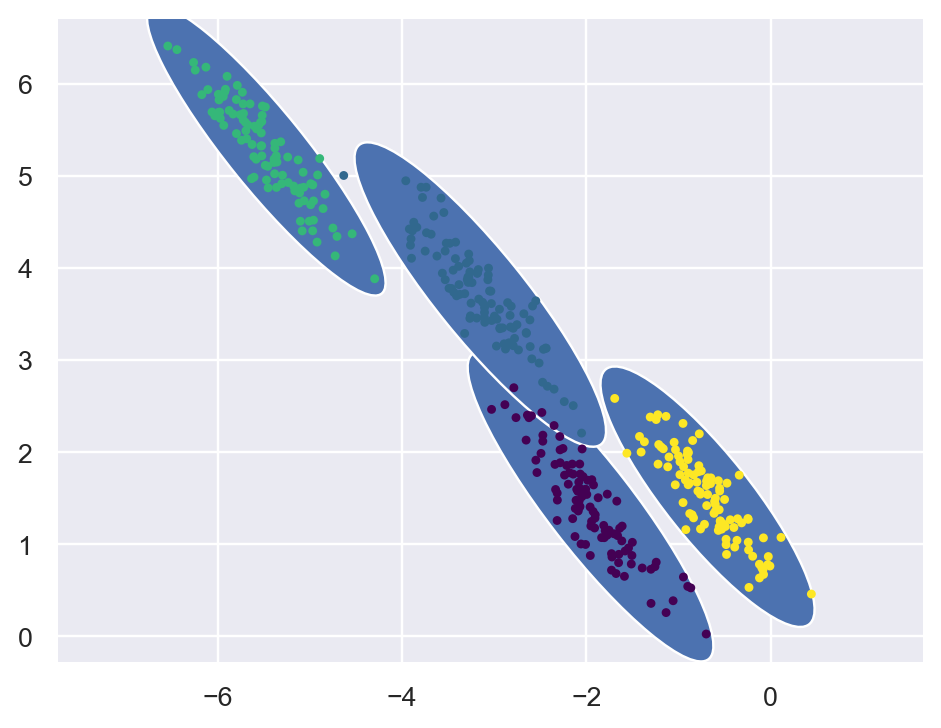

In [21]:
gmm = GaussianMixture(n_components=4,covariance_type='full', 
                      random_state=42)
plt.figure(dpi=175)
plot_gmm(gmm, X_stretched)